<a href="https://colab.research.google.com/github/proxolo1/AITA-AVATAR/blob/master/IDMVTON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Input Images:


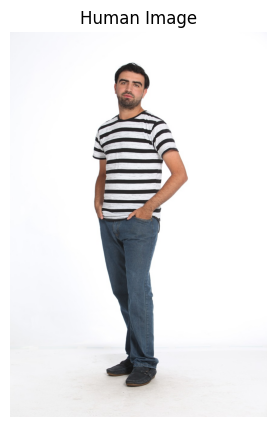

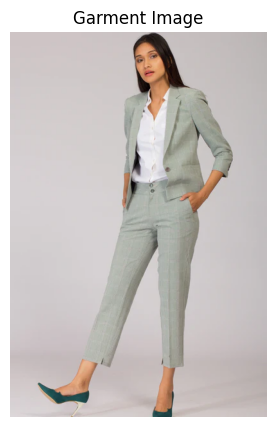

Image saved as human_image.png
Image saved as garment_image.png

Output Image:


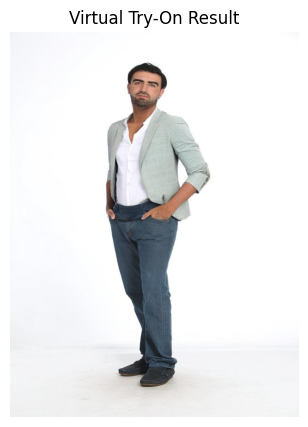

Image saved as output_image.png

All images have been displayed and saved to your Colab environment.


In [1]:
import requests
import base64
import matplotlib.pyplot as plt
from PIL import Image
import io
from google.colab import files
import os

# Function to convert image file to base64
def image_file_to_base64(image_path):
    with open(image_path, 'rb') as f:
        image_data = f.read()
    return base64.b64encode(image_data).decode('utf-8')

# Function to fetch image from URL and convert to base64
def image_url_to_base64(image_url):
    response = requests.get(image_url)
    image_data = response.content
    return base64.b64encode(image_data).decode('utf-8')

# Function to display image from URL
def display_image_from_url(url, title):
    response = requests.get(url)
    img = Image.open(io.BytesIO(response.content))
    plt.figure(figsize=(5, 5))
    plt.title(title)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return response.content

# Function to save image to Colab
def save_image(image_data, filename):
    with open(filename, 'wb') as f:
        f.write(image_data)
    print(f"Image saved as {filename}")

# API credentials and endpoint
api_key = "SG_89c6db0c9c6be6a2"
url = "https://api.segmind.com/v1/idm-vton"

# Request payload
data = {
  "crop": False,
  "seed": 42,
  "steps": 30,
  "category": "upper_body",
  "force_dc": False,
  "human_img": "https://storage.needpix.com/rsynced_images/full-body-shot-1584734_1280.jpg",
  "garm_img": "https://segmind-sd-models.s3.amazonaws.com/display_images/idm-viton-dress.png",
  "mask_only": False,
  "garment_des": "Green colour semi Formal Blazer"
}

# Display input images
print("Input Images:")
human_img_data = display_image_from_url(data["human_img"], "Human Image")
garment_img_data = display_image_from_url(data["garm_img"], "Garment Image")

# Save input images to Colab
save_image(human_img_data, "human_image.png")
save_image(garment_img_data, "garment_image.png")

# Make API request
headers = {'x-api-key': api_key}
response = requests.post(url, json=data, headers=headers)

# Check if request was successful
if response.status_code == 200:
    # Display output image
    print("\nOutput Image:")
    output_img = Image.open(io.BytesIO(response.content))
    plt.figure(figsize=(5, 5))
    plt.title("Virtual Try-On Result")
    plt.imshow(output_img)
    plt.axis('off')
    plt.show()

    # Save output image to Colab
    save_image(response.content, "output_image.png")

    print("\nAll images have been displayed and saved to your Colab environment.")
else:
    print(f"Error: {response.status_code}")
    print(response.text)